## Домашнее задание №5 к занятию от 14.11.2019 г. «Производная функции нескольких аргументов»
ФИО: Кривова Татьяна Сергеевна

### Задание 1: 
Посчитайте частные производные функций в точках
(как обычно, необходимо решение на бумажке или в LaTeX и на numpy):

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [3]:
from PIL import Image

import numpy as np
import math

from sympy import *

from scipy.optimize import approx_fprime
from scipy.optimize import minimize

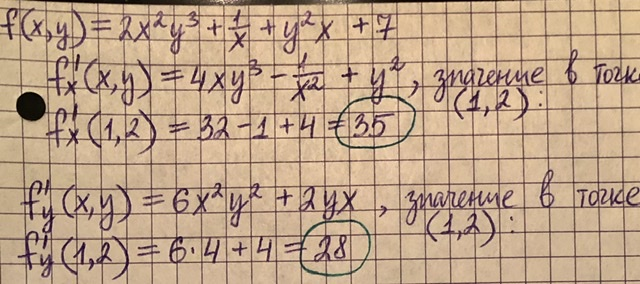

In [2]:
img_511 = Image.open("z511.jpeg")
img_511

In [4]:
# с помощью sympy

x, y = symbols('x y')
func = 2*(x**2)*(y**3) + 1/x + (y**2)*x + 7

In [5]:
df_x = func.diff(x)

print(f'Частная производная по x и ее значение в точке (x0=1, y0=2):')
df_x
df_x.evalf(subs={x: 1.0, y:2.0}, n=10)

Частная производная по x и ее значение в точке (x0=1, y0=2):


4*x*y**3 + y**2 - 1/x**2

35.00000000

In [6]:
df_y = func.diff(y)

print(f'Частная производная по y и ее значение в точке (x0=1, y0=2):')
df_y
df_y.evalf(subs={x: 1.0, y:2.0}, n=10)

Частная производная по y и ее значение в точке (x0=1, y0=2):


6*x**2*y**2 + 2*x*y

28.00000000

In [7]:
# с помощью scipy

def f1(i):
    return 2*(i[0]**2)*(i[1]**3) + 1/i[0] + (i[1]**2)*i[0] + 7

In [8]:
i = np.array([1.0,2.0])

approx_fprime(i, f1, epsilon=0.0000001) # Finite-difference approximation of the gradient of a scalar function

array([35.00000172, 28.00000125])

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

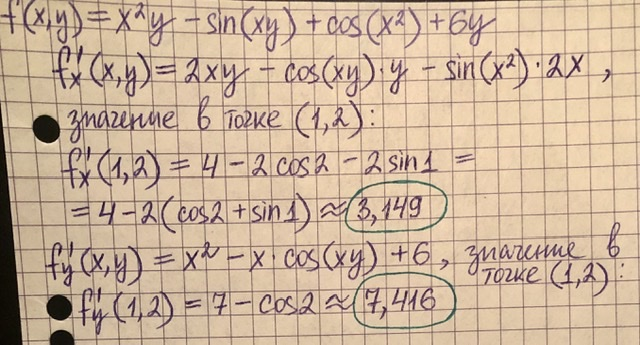

In [9]:
img_512 = Image.open("z512.jpeg")
img_512

In [10]:
# с помощью sympy

x, y = symbols('x y')
func = (x**2)*y - sin(x*y) + cos(x**2) + 6*y

In [11]:
df_x = func.diff(x)

print(f'Частная производная по x и ее значение в точке (x0=1, y0=2):')
df_x
df_x.evalf(subs={x: 1.0, y:2.0}, n=10)

Частная производная по x и ее значение в точке (x0=1, y0=2):


2*x*y - 2*x*sin(x**2) - y*cos(x*y)

3.149351703

In [12]:
df_y = func.diff(y)

print(f'Частная производная по y и ее значение в точке (x0=1, y0=2):')
df_y
df_y.evalf(subs={x: 1.0, y:2.0}, n=10)

Частная производная по y и ее значение в точке (x0=1, y0=2):


x**2 - x*cos(x*y) + 6

7.416146837

In [13]:
# с помощью scipy

def f2(i):
    return (i[0]**2)*i[1] - math.sin(i[0]*i[1]) + math.cos(i[0]**2) + 6*i[1]

In [14]:
i = np.array([1.0,2.0])

approx_fprime(i, f2, epsilon=0.0000001)

array([3.14935191, 7.41614688])

### Задание 2:

Градиентный спуск своими руками

In [15]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [16]:
x = np.array([100, 200])
lr = 0.1

In [17]:
for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x, f, epsilon=0.0000001)
    
    # Update x with gradient
    x = x - lr*grad

In [18]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-2.96296394e-08 -9.25927903e-09]
Значение функции в минимуме:  9.636497816076692e-16


Проверка с помощью встроенной функции numpy: 

In [19]:
minimize(f, [100,200], method='nelder-mead', options={'xatol': 0.0000001, 'fatol':0.0000001, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 152


 final_simplex: (array([[ 3.12152897e-08, -3.24100656e-09],
       [-2.20494632e-08,  2.27698132e-08],
       [-4.17557020e-08, -7.18244433e-08]]), array([9.84898433e-16, 1.00464322e-15, 6.90228930e-15]))
           fun: 9.848984333842756e-16
       message: 'Optimization terminated successfully.'
          nfev: 152
           nit: 79
        status: 0
       success: True
             x: array([ 3.12152897e-08, -3.24100656e-09])